In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv("USVideos.csv")

In [2]:
df.columns

Index(['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'description'],
      dtype='object')

#Data Cleaning and preparation

In [3]:
df.isnull().sum()

video_id                    0
trending_date               0
title                       0
channel_title               0
category_id                 0
publish_time                0
tags                        0
views                       0
likes                       0
dislikes                    0
comment_count               0
thumbnail_link              0
comments_disabled           0
ratings_disabled            0
video_error_or_removed      0
description               570
dtype: int64

Exploratory Data Analysis

In [4]:
channel_likes = df.groupby(['channel_title'])['likes'].sum().reset_index().rename(columns={'likes':'count'}).sort_values(by='count' ,ascending=False)[:10]
channel_likes

,channel_title,count
2094,ibighit,199247121
358,ChildishGambinoVEVO,96700818
541,Dude Perfect,60275557
1129,Marvel Entertainment,55873344
110,ArianaGrandeVevo,52170970
2112,jypentertainment,44900910
1702,TaylorSwiftVEVO,39292840
561,Ed Sheeran,39279211
2015,ZaynVEVO,31695245
1054,Logan Paul Vlogs,31545290


In [5]:
channel_dislikes = df.groupby(['channel_title'])['dislikes'].sum().reset_index().rename(columns={'dislikes':'count'}).sort_values(by='count',ascending=False)[:10]
channel_dislikes

,channel_title,count
1054,Logan Paul Vlogs,13847251
2010,YouTube Spotlight,10924092
358,ChildishGambinoVEVO,6054434
307,Call of Duty,5644083
2094,ibighit,3467306
2112,jypentertainment,2482131
1702,TaylorSwiftVEVO,2127542
110,ArianaGrandeVevo,1931230
1107,MalumaVEVO,1757948
946,KatyPerryVEVO,1669622


# Analyzing Numerical Variables

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

Text(0.5, 1.0, 'Top 10 Most Disliked Channels')

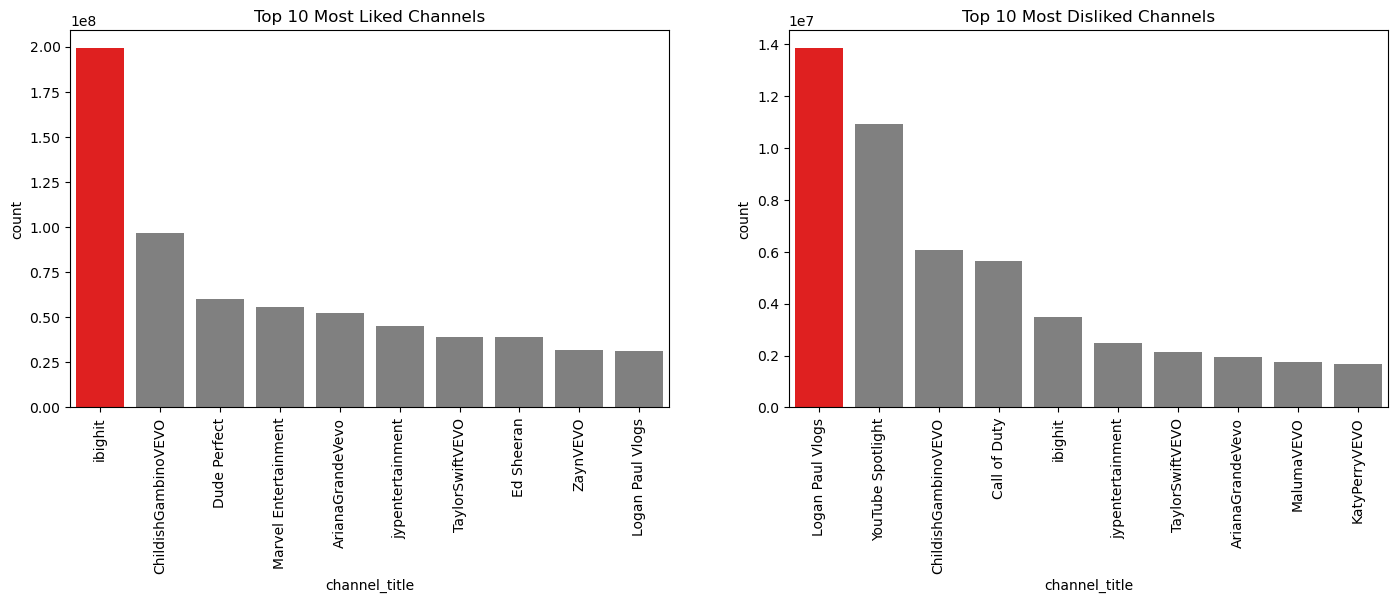

In [7]:

fig, axes = plt.subplots(ncols=2,figsize=(17,5),dpi=100)
clrs = ['grey' if (x<max(channel_likes['count'])) else 'red' for x in channel_likes['count']]
g = sns.barplot(channel_likes['channel_title'],channel_likes['count'],ax=axes[0], palette=clrs)
g.set_xticklabels(axes[0].get_xticklabels(),rotation=90)
axes[0].set_title('Top 10 Most Liked Channels')
plt.xticks(rotation=90)

sns.barplot(channel_dislikes['channel_title'],channel_dislikes['count'],ax=axes[1],palette=clrs)
axes[1].set_title('Top 10 Most Disliked Channels')



In [8]:
channel_views = df.groupby(['channel_title'])['views'].sum().reset_index().rename(columns={'views':'count'}).sort_values(by='count',ascending=False)[:10]
channel_views

,channel_title,count
358,ChildishGambinoVEVO,3758488765
2094,ibighit,2235906679
541,Dude Perfect,1870085178
1129,Marvel Entertainment,1808998971
110,ArianaGrandeVevo,1576959172
1107,MalumaVEVO,1551515831
2112,jypentertainment,1486972132
1614,Sony Pictures Entertainment,1432374398
650,FoxStarHindi,1238609854
177,BeckyGVEVO,1182971286


In [9]:
channel_comments = df.groupby(['channel_title'])['comment_count'].sum().reset_index().rename(columns={'comment_count':'count'}).sort_values(by='count',ascending=False)[:10]
channel_comments

,channel_title,count
2094,ibighit,31817464
1054,Logan Paul Vlogs,14870370
358,ChildishGambinoVEVO,10151289
2112,jypentertainment,7575510
2010,YouTube Spotlight,6495154
1129,Marvel Entertainment,6453560
1530,Safiya Nygaard,4419873
110,ArianaGrandeVevo,4295333
307,Call of Duty,4224430
2101,jacksfilms,4074130


Text(0.5, 1.0, 'Top 10 Most Commented Channels')

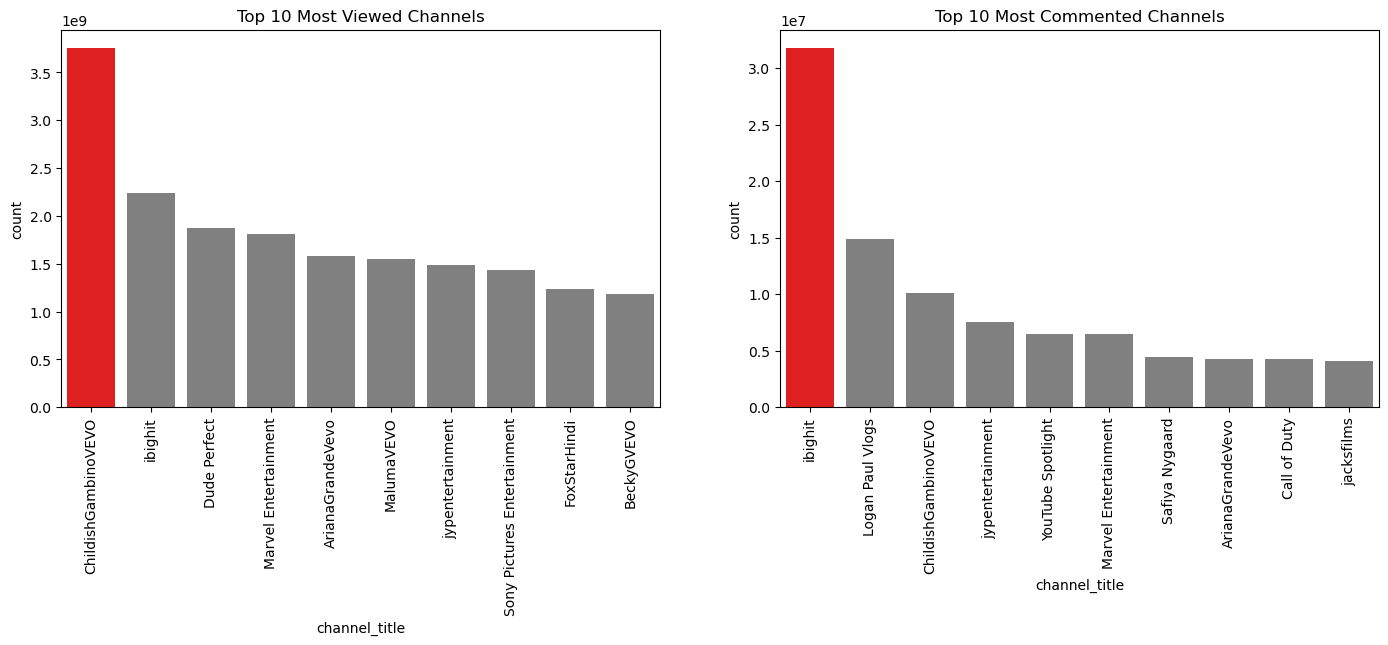

In [10]:
fig, axes = plt.subplots(ncols=2,figsize=(17,5),dpi=100)
clrs = ['grey' if (x<max(channel_likes['count'])) else 'red' for x in channel_likes['count']]
g = sns.barplot(channel_views['channel_title'],channel_views['count'],ax=axes[0], palette=clrs)
g.set_xticklabels(axes[0].get_xticklabels(),rotation=90)
axes[0].set_title('Top 10 Most Viewed Channels')
plt.xticks(rotation=90)

sns.barplot(channel_comments['channel_title'],channel_comments['count'],ax=axes[1],palette=clrs)
axes[1].set_title('Top 10 Most Commented Channels')

Analysis of Distribution of Likes, Dislikes, Comment Count 

In [11]:
df['likes_log'] = np.log(df['likes']+1)
df['views_log'] = np.log(df['views']+1)
df['dislikes_log'] = np.log(df['dislikes']+1)
df['comment_log'] = np.log(df['comment_count']+1)

AttributeError: 'Rectangle' object has no property 'normed'

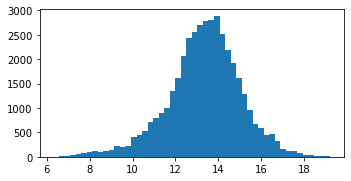

In [12]:
plt.figure(figsize=(12,6))
plt.subplot(221)
g1 = sns.distplot(df['views_log'])
g1.set_title("Views Log Distribution",fontsize=12)

plt.subplot(224)
g1 = sns.distplot(df['likes_log'],color='green')
g1.set_title("Views Likes Distribution",fontsize=12)

plt.subplot(223)
g1 = sns.distplot(df['dislikes_log'],color='red')
g1.set_title("Views Dislikes Distribution",fontsize=12)

plt.subplot(222)
g1 = sns.distplot(df['comment_log'],color='red')
g1.set_title("Views Comments Distribution",fontsize=12)

plt.subplots_adjust(wspace=0.2,hspace=0.4,top=0.9)

In [13]:
#Likes are slightly skewed to the right

In [14]:
df['category_id'].unique()

array([22, 24, 23, 28,  1, 25, 17, 10, 15, 27, 26,  2, 19, 20, 29, 43],
      dtype=int64)

In [15]:
df.loc[(df['category_id']==1),"category_name"] = 'Film and Animation'
df.loc[(df['category_id']==2),"category_name"] = 'Cars and Vehicles'
df.loc[(df['category_id']==10),"category_name"] = 'Music'
df.loc[(df['category_id']==15),"category_name"] = 'Pets and Animals'
df.loc[(df['category_id']==17),"category_name"] = 'Sports'
df.loc[(df['category_id']==19),"category_name"] = 'Travel and Events'
df.loc[(df['category_id']==20),"category_name"] = 'Gaming'
df.loc[(df['category_id']==22),"category_name"] = 'People and Blogs'
df.loc[(df['category_id']==23),"category_name"] = 'Comedy'
df.loc[(df['category_id']==24),"category_name"] = 'Entertainment'
df.loc[(df['category_id']==25),"category_name"] = 'News and Politics'
df.loc[(df['category_id']==26),"category_name"] = 'How to and Styles'
df.loc[(df['category_id']==27),"category_name"] = 'Education'
df.loc[(df['category_id']==28),"category_name"] = 'Science and Technology'
df.loc[(df['category_id']==29),"category_name"] = 'Non profits and Activism'


In [16]:
#Lets analyze likes, dislikes, comment_count by category

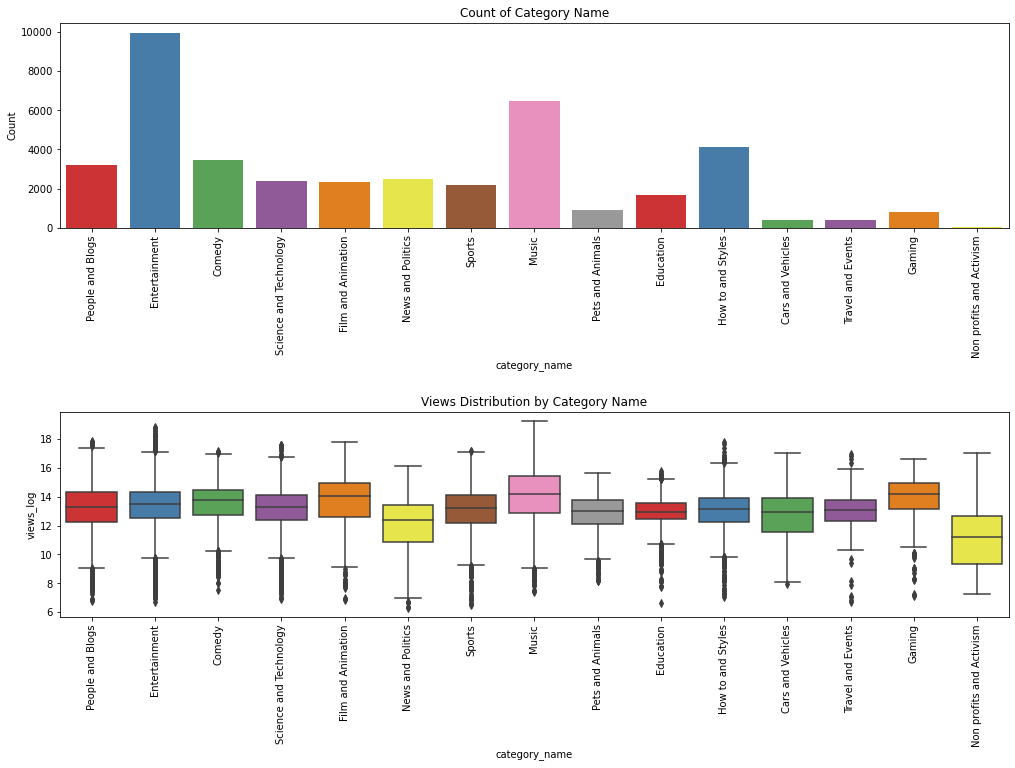

In [17]:
plt.figure(figsize=(17,6))
plt.subplot(211)
g = sns.countplot('category_name',data=df, palette='Set1')
g.set_xticklabels(g.get_xticklabels(),rotation=90)
g.set_ylabel('Count')
g.set_title('Count of Category Name')

plt.subplot(212)
g1 = sns.boxplot(x='category_name',y='views_log',data=df,palette='Set1')
g1.set_xticklabels(g1.get_xticklabels(),rotation=90)
g1.set_title('Views Distribution by Category Name')

plt.subplots_adjust(hspace=0.9,top=1.5)

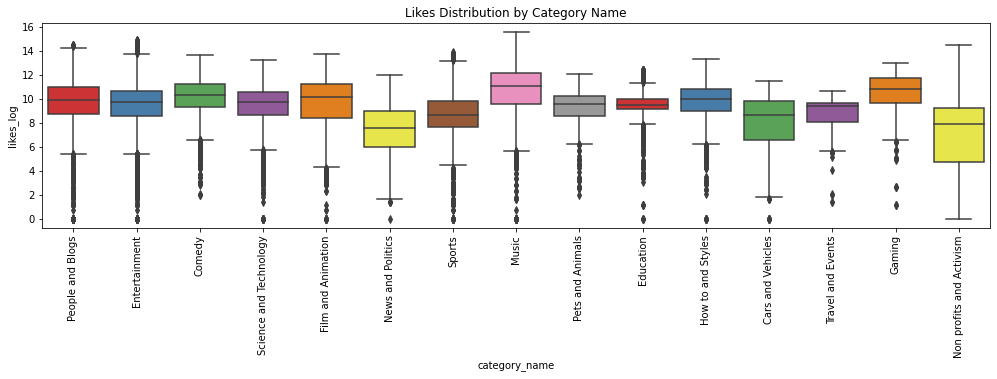

In [18]:
plt.figure(figsize=(17,6))
plt.subplot(211)
g1 = sns.boxplot(x='category_name',y='likes_log',data=df,palette='Set1')
g1.set_xticklabels(g1.get_xticklabels(),rotation=90)
g1.set_title('Likes Distribution by Category Name')

plt.subplots_adjust(hspace=0.9,top=1.5)

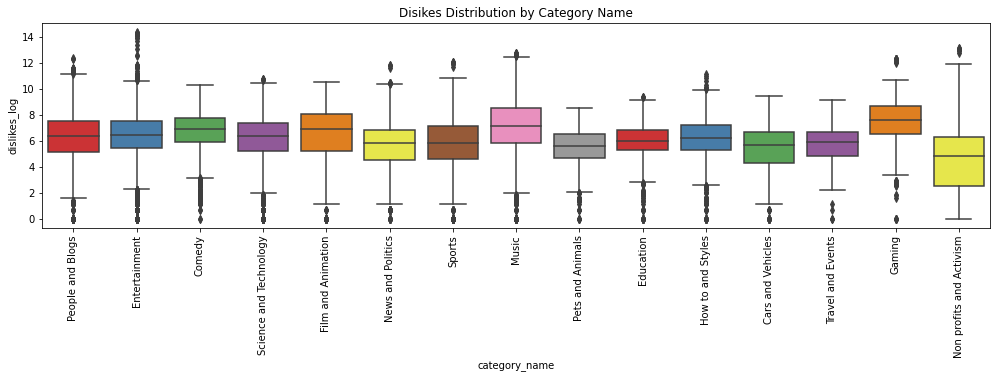

In [19]:
plt.figure(figsize=(17,6))
plt.subplot(211)
g1 = sns.boxplot(x='category_name',y='dislikes_log',data=df,palette='Set1')
g1.set_xticklabels(g1.get_xticklabels(),rotation=90)
g1.set_title('Disikes Distribution by Category Name')

plt.subplots_adjust(hspace=0.9,top=1.5)

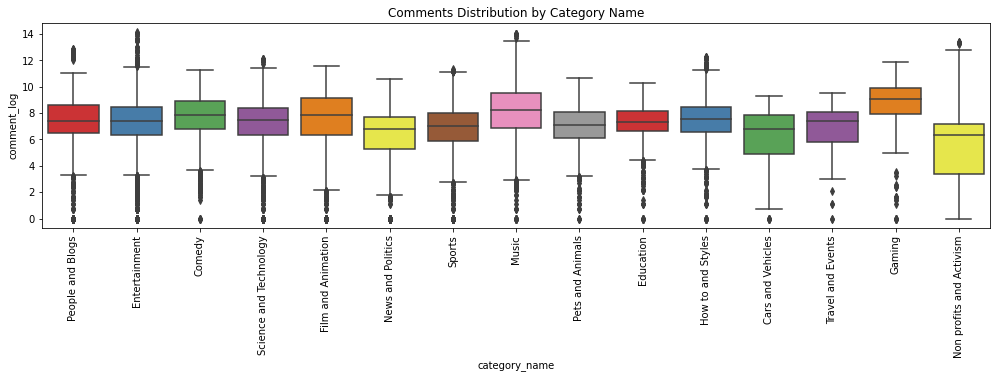

In [20]:
plt.figure(figsize=(17,6))
plt.subplot(211)
g1 = sns.boxplot(x='category_name',y='comment_log',data=df,palette='Set1')
g1.set_xticklabels(g1.get_xticklabels(),rotation=90)
g1.set_title('Comments Distribution by Category Name')

plt.subplots_adjust(hspace=0.9,top=1.5)

In [21]:
#hmm, Music and Gaming videos has more likes. Non profits and Activism videos has less views.

In [22]:
#Now, lets check correlation matrix

In [23]:
df['like_rate'] = df['likes']/df['views']*100
df['dislike_rate'] = df['dislikes']/df['views']*100
df['comment_rate'] = df['comment_count']/df['views']*100

In [24]:
#..lets plot :)
df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,...,video_error_or_removed,description,likes_log,views_log,dislikes_log,comment_log,category_name,like_rate,dislike_rate,comment_rate
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,...,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,10.960027,13.525659,7.995307,9.677528,People and Blogs,7.686932,0.396326,2.131822
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,...,False,"One year after the presidential election, John...",11.484382,14.698775,8.723719,9.449672,Entertainment,4.017930,0.254095,0.525181
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,...,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,11.891595,14.975981,8.582981,9.009692,Comedy,4.575780,0.167292,0.256342
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,...,False,Today we find out if Link is a Nickelback amat...,9.227492,12.745978,6.502790,7.671827,Entertainment,2.964146,0.194074,0.625350
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,...,False,I know it's been a while since we did this sho...,11.792343,14.555413,7.595890,9.771041,Entertainment,6.309732,0.094907,0.835890


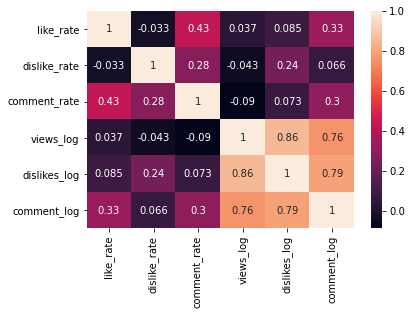

In [25]:
sns.heatmap(df[['like_rate','dislike_rate','comment_rate','views_log','dislikes_log','comment_log']].corr(),annot=True)

In [26]:
#okay, so views and comments have positive correlation. Dislikes and comments also has positive correlation.
#makes sense, that if the video is viewed, people are likely to like, dislike or comment the video

Lets examine Texts! There are four textual data:
1. title
2. channel_title
3. tags
4. description

We'll do Word Cloud

In [27]:
import sys
from wordcloud import WordCloud , STOPWORDS

In [28]:
stopwords = set(STOPWORDS)

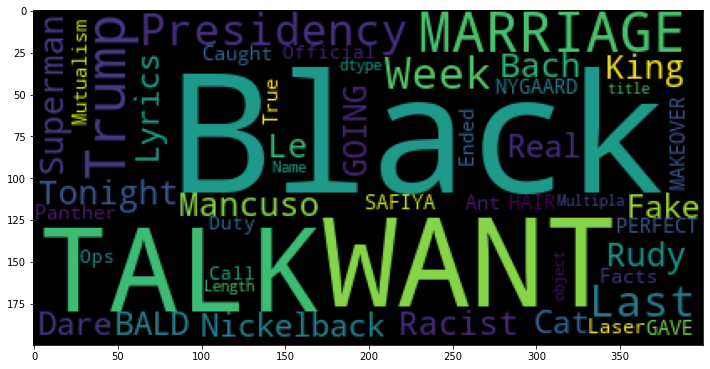

In [29]:
plt.figure(figsize=(12,10))
wordcloud = WordCloud(stopwords = stopwords, max_words = 1000).generate(str(df['title']))
plt.imshow(wordcloud)

In [30]:
#Ok, many official videos in title
#Lets check channel_title

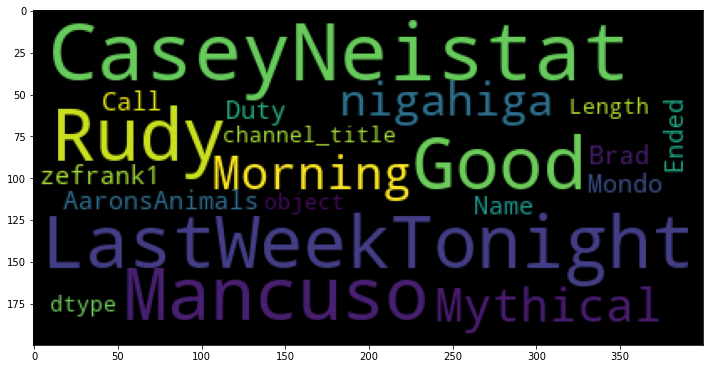

In [31]:
plt.figure(figsize=(12,10))
wordcloud = WordCloud(stopwords = stopwords, max_words = 1000).generate(str(df['channel_title']))
plt.imshow(wordcloud)

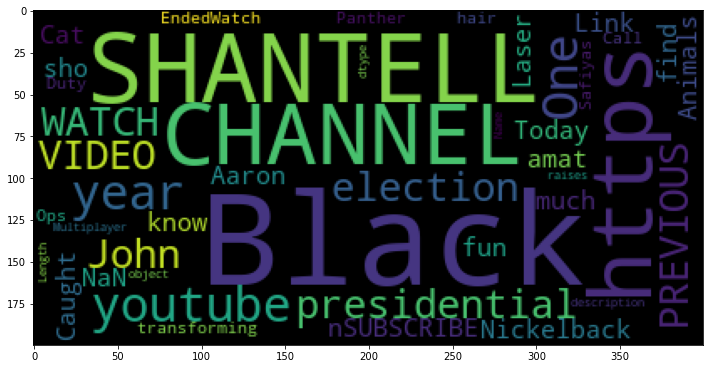

In [32]:
#And Description next!
plt.figure(figsize=(12,10))
wordcloud = WordCloud(stopwords = stopwords, max_words = 1000).generate(str(df['description']))
plt.imshow(wordcloud)

In [33]:
#lot of links in the descritpion!

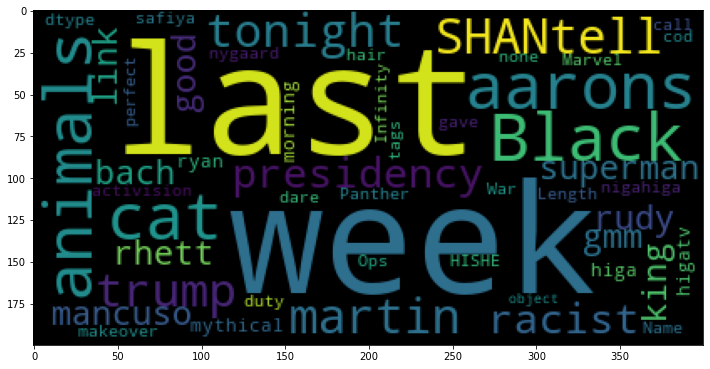

In [34]:
#And last tags
plt.figure(figsize=(12,10))
wordcloud = WordCloud(stopwords = stopwords, max_words = 1000).generate(str(df['tags']))
plt.imshow(wordcloud)

In [35]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [36]:
stopwords_en = set(stopwords.words('english'))

In [48]:
df['count_words']= df['title'].apply(lambda x: len(str(x).split()))
df['words_tags'] = df['tags'].apply(lambda x: len(str(x).split()))

Text(0.5, 1.0, 'DIstribution of Word Count in Title and Tags')

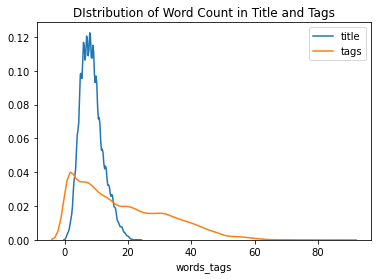

In [50]:
g3 = sns.distplot(df['count_words'],hist=False,label='title')
g3 = sns.distplot(df['words_tags'],hist=False,label='tags')
g3.set_title('DIstribution of Word Count in Title and Tags')

Text(0.5, 1.0, 'Likes by words used in tags')

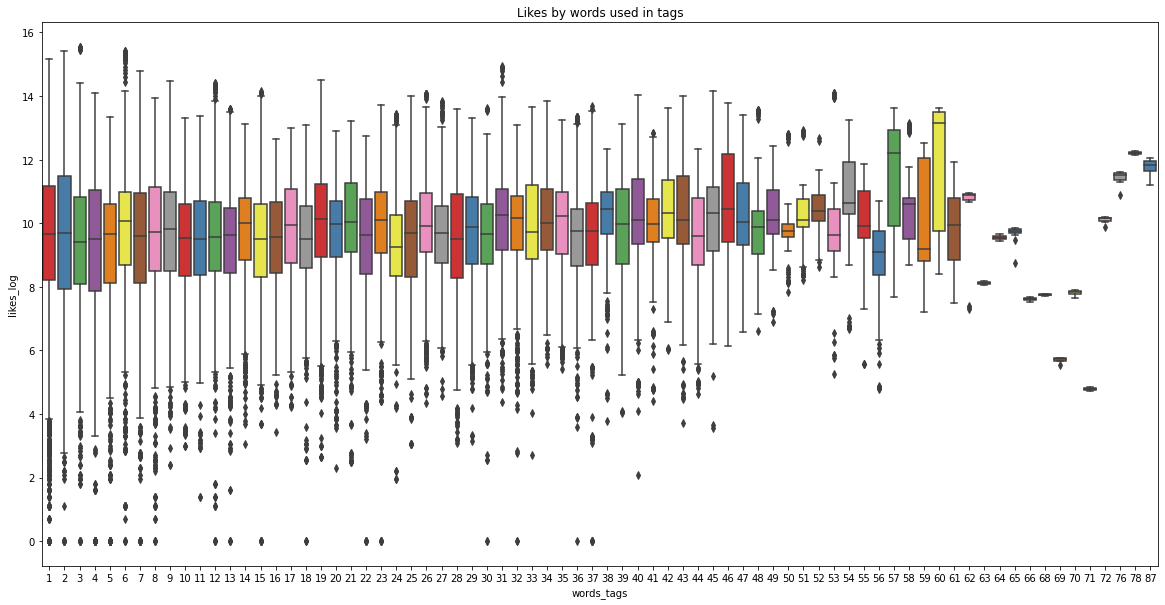

In [56]:
plt.figure(figsize=(20,10))
g4 = sns.boxplot(x='words_tags',y='likes_log',data=df,palette='Set1')
g4.set_title('Likes by words used in tags')

In [57]:
#the mean distribution of likes is usually 10-12M likes dispite of using 1 -30 tags. However we see a pattern where more tags have more likes